# **Importing the data and explore it and preprocess it as needed**

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('Train_Data/Train.csv')
data2 = pd.read_csv('Train_Data/Train_Vehicletravellingdata.csv')
data3 = pd.read_csv('Train_Data/Train_WeatherData.csv')

In [3]:
data1.shape

(12994, 5)

In [4]:
data2.shape

(162566, 10)

In [5]:
data3.shape

(162566, 9)

In [6]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'V2', 'V5', 'V6', 'DrivingStyle'], dtype='object')
Index(['ID', 'V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V18'], dtype='object')
Index(['ID', 'V1', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19'], dtype='object')


In [7]:
data1 = data1.rename(columns = {'V2':'vehicle length' ,
                        'V5':'vehicle weight' ,
                        'V6':'axles number'})

In [8]:
data2 = data2.rename(columns = {'V1':'time of collection' ,
                        'V3':'Lane of the road' ,
                        'V4':'vehicle speed',
                        'V7':'perceding vehicle ID',
                        'V8':'perceding vehicle speed',
                        'V9':'perceding vehicle weight',
                        'V10':'perceding vehicle length',
                        'V11':'perceding vehicle time-gap',
                        'V18':'road condition'})

In [9]:
data2.drop(['Lane of the road', 
            'perceding vehicle ID',
            'perceding vehicle speed',
            'perceding vehicle weight',
            'perceding vehicle length',
            'perceding vehicle time-gap',],
            axis=1, inplace=True)

In [10]:
data3 = data3.rename(columns = {'V1':'time of collection' ,
                        'V12':'Air temperature' ,
                        'V13':'precipitation type',
                        'V14':'precipitation intensity',
                        'V15':'relative humidity',
                        'V16':'wind direction',
                        'V17':'wind speed',
                        'V19':'Lighting condition'})

In [11]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'vehicle length', 'vehicle weight', 'axles number',
       'DrivingStyle'],
      dtype='object')
Index(['ID', 'time of collection', 'vehicle speed', 'road condition'], dtype='object')
Index(['ID', 'time of collection', 'Air temperature', 'precipitation type',
       'precipitation intensity', 'relative humidity', 'wind direction',
       'wind speed', 'Lighting condition'],
      dtype='object')


In [12]:
data1.isnull().sum()

ID                0
vehicle length    0
vehicle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [13]:
data2.isnull().sum()

ID                    0
time of collection    0
vehicle speed         0
road condition        0
dtype: int64

In [14]:
data3.isnull().sum()

ID                            0
time of collection            0
Air temperature            2057
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction             2114
wind speed                 2464
Lighting condition            0
dtype: int64

In [15]:
data1.isna().sum()


ID                0
vehicle length    0
vehicle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [16]:
data2.isna().sum()


ID                    0
time of collection    0
vehicle speed         0
road condition        0
dtype: int64

In [17]:
data3.isna().sum()

ID                            0
time of collection            0
Air temperature            2057
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction             2114
wind speed                 2464
Lighting condition            0
dtype: int64

In [18]:
print(int(data3['Air temperature'].mean()))
print(int(data3['Air temperature'].median()))
data3['Air temperature'].fillna( value = int(data3['Air temperature'].median()),inplace= True)

#data3.isnull().sum()

4
5


In [19]:
print(data2['road condition'].value_counts())
data2['road condition'] = pd.factorize(data2['road condition'])[0]
print(data2['road condition'].value_counts())

Dry               117666
Wet                37628
Visible tracks      5535
Snow covered        1737
Name: road condition, dtype: int64
0    117666
1     37628
3      5535
2      1737
Name: road condition, dtype: int64


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  162566 non-null  object
 1   time of collection  162566 non-null  object
 2   vehicle speed       162566 non-null  int64 
 3   road condition      162566 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ MB


In [21]:
data2_gropued = data2.groupby('ID')[['vehicle speed','road condition']].mean()

In [22]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle speed   12994 non-null  float64
 1   road condition  12994 non-null  float64
dtypes: float64(2)
memory usage: 304.5+ KB


In [23]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle speed   12994 non-null  float64
 1   road condition  12994 non-null  float64
dtypes: float64(2)
memory usage: 304.5+ KB


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              12994 non-null  object
 1   vehicle length  12994 non-null  int64 
 2   vehicle weight  12994 non-null  int64 
 3   axles number    12994 non-null  int64 
 4   DrivingStyle    12994 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.7+ KB


In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  162566 non-null  object
 1   time of collection  162566 non-null  object
 2   vehicle speed       162566 non-null  int64 
 3   road condition      162566 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ MB


In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       162566 non-null  object 
 1   time of collection       162566 non-null  object 
 2   Air temperature          162566 non-null  float64
 3   precipitation type       162566 non-null  object 
 4   precipitation intensity  162566 non-null  object 
 5   relative humidity        160461 non-null  float64
 6   wind direction           160452 non-null  float64
 7   wind speed               160102 non-null  float64
 8   Lighting condition       162566 non-null  object 
dtypes: float64(4), object(5)
memory usage: 11.2+ MB


In [27]:
data3.isnull().sum()

ID                            0
time of collection            0
Air temperature               0
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction             2114
wind speed                 2464
Lighting condition            0
dtype: int64

In [28]:
print(int(data3['relative humidity'].mean()))
print(int(data3['relative humidity'].median()))

60
58


In [29]:
data3['relative humidity'].fillna( value = data3['relative humidity'].median)
data3.isnull().sum()

ID                            0
time of collection            0
Air temperature               0
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction             2114
wind speed                 2464
Lighting condition            0
dtype: int64

In [30]:
print(int(data3['wind direction'].mean()))
print(int(data3['wind direction'].median()))

182
180


In [31]:
data3['wind direction'].fillna( value = int(data3['wind direction'].median()),inplace= True)
data3.isnull().sum()

ID                            0
time of collection            0
Air temperature               0
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction                0
wind speed                 2464
Lighting condition            0
dtype: int64

In [32]:
print(int(data3['wind speed'].mean()))
print(int(data3['wind speed'].median()))

4
4


In [33]:
data3['wind speed'].fillna( value = int(data3['wind speed'].median()),inplace= True)
data3.isnull().sum()

ID                            0
time of collection            0
Air temperature               0
precipitation type            0
precipitation intensity       0
relative humidity          2105
wind direction                0
wind speed                    0
Lighting condition            0
dtype: int64

In [34]:
data3['precipitation type'] = pd.factorize(data3['precipitation type'])[0]
data3['Lighting condition'] = pd.factorize(data3['Lighting condition'])[0]
data3['precipitation intensity'] = pd.factorize(data3['precipitation intensity'])[0]

clear    151259
snow       5944
rain       5363
Name: precipitation type, dtype: int64
0    151259
2      5944
1      5363
Name: precipitation type, dtype: int64


In [35]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       162566 non-null  object 
 1   time of collection       162566 non-null  object 
 2   Air temperature          162566 non-null  float64
 3   precipitation type       162566 non-null  int64  
 4   precipitation intensity  162566 non-null  int64  
 5   relative humidity        160461 non-null  float64
 6   wind direction           162566 non-null  float64
 7   wind speed               162566 non-null  float64
 8   Lighting condition       162566 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 11.2+ MB


In [36]:
data3_gropued = data3.groupby('ID')[['Air temperature','precipitation type','precipitation intensity','relative humidity','wind direction','wind speed','Lighting condition']].mean()

In [37]:
data2_gropued.head()

,vehicle speed,road condition
ID,,
DR_10002,84.400000,0.0
DR_10013,86.555556,0.0
DR_10023,83.125000,0.0
DR_10024,86.666667,0.0
DR_10025,81.500000,1.0


In [38]:
data3_gropued.head()

,Air temperature,precipitation type,precipitation intensity,relative humidity,wind direction,wind speed,Lighting condition
ID,,,,,,,
DR_10002,2.2000,0.0,0.0,66.6000,173.200,5.8000,0.0
DR_10013,4.0000,0.0,2.0,58.0000,163.000,8.0000,2.0
DR_10023,6.0625,0.0,2.0,34.0625,205.875,3.0625,2.0
DR_10024,5.0000,2.0,1.0,NaN,180.000,4.0000,1.0
DR_10025,1.0000,0.0,2.0,87.0000,11.000,3.0000,2.0


In [39]:
data1.head()

,ID,vehicle length,vehicle weight,axles number,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [40]:
print(data1.shape)
print(data2_gropued.shape)
print(data3_gropued.shape)

(12994, 5)
(12994, 2)
(12994, 7)


In [41]:
data1['ID'].drop_duplicates

<bound method Series.drop_duplicates of 0        DR_24526
1        DR_30052
2        DR_40928
3        DR_66033
4        DR_45266
           ...   
12989    DR_61322
12990    DR_35712
12991    DR_61590
12992    DR_69505
12993    DR_56117
Name: ID, Length: 12994, dtype: object>

In [42]:
merged_data = pd.merge(data2_gropued,data3_gropued, on ='ID')

In [43]:
merged_data2 = pd.merge(data1,merged_data, on='ID')

In [44]:
merged_data2.head()

,ID,vehicle length,vehicle weight,axles number,DrivingStyle,vehicle speed,road condition,Air temperature,precipitation type,precipitation intensity,relative humidity,wind direction,wind speed,Lighting condition
0,DR_24526,1265,10243,2,2,87.473684,0.0,7.000000,0.0,0.0,95.000000,125.157895,0.052632,0.0
1,DR_30052,1680,30871,6,2,82.272727,0.0,4.636364,0.0,0.0,95.545455,157.818182,6.000000,0.0
2,DR_40928,936,3224,4,2,85.090909,0.0,1.545455,1.0,0.0,95.000000,64.454545,0.000000,0.0
3,DR_66033,1503,3315,4,2,82.818182,0.0,3.545455,0.0,0.0,95.000000,169.727273,1.363636,0.0
4,DR_45266,929,3022,4,2,82.750000,0.0,3.000000,0.0,0.0,95.000000,191.000000,3.000000,0.0


In [45]:
merged_data2.isnull().sum()

ID                           0
vehicle length               0
vehicle weight               0
axles number                 0
DrivingStyle                 0
vehicle speed                0
road condition               0
Air temperature              0
precipitation type           0
precipitation intensity      0
relative humidity          137
wind direction               0
wind speed                   0
Lighting condition           0
dtype: int64

In [46]:
merged_data2 = merged_data2.dropna(subset=['relative humidity'])
merged_data2 = merged_data2.drop('ID',axis = 1)

In [47]:
merged_data2.isnull().sum()

vehicle length             0
vehicle weight             0
axles number               0
DrivingStyle               0
vehicle speed              0
road condition             0
Air temperature            0
precipitation type         0
precipitation intensity    0
relative humidity          0
wind direction             0
wind speed                 0
Lighting condition         0
dtype: int64

In [48]:
merged_data2.columns

Index(['vehicle length', 'vehicle weight', 'axles number', 'DrivingStyle',
       'vehicle speed', 'road condition', 'Air temperature',
       'precipitation type', 'precipitation intensity', 'relative humidity',
       'wind direction', 'wind speed', 'Lighting condition'],
      dtype='object')

In [49]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 12993
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle length           12857 non-null  int64  
 1   vehicle weight           12857 non-null  int64  
 2   axles number             12857 non-null  int64  
 3   DrivingStyle             12857 non-null  int64  
 4   vehicle speed            12857 non-null  float64
 5   road condition           12857 non-null  float64
 6   Air temperature          12857 non-null  float64
 7   precipitation type       12857 non-null  float64
 8   precipitation intensity  12857 non-null  float64
 9   relative humidity        12857 non-null  float64
 10  wind direction           12857 non-null  float64
 11  wind speed               12857 non-null  float64
 12  Lighting condition       12857 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.4 MB


In [50]:
merged_data2.shape

(12857, 13)

# **Building differnent models and see which is the best model for the dataset**

---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7349319507453014
f1 score = 0.7071678549301111
precision = 0.7118768591458767
recall =  0.7065907781482968
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7362281270252754
f1 score = 0.7089959851209002
precision = 0.7099398205362419
recall =  0.7105386494094003
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7401166558651977
f1 score = 0.7147102759540266
precision = 0.716574724472579
recall =  0.7151829413784473
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7336357744653272
f1 score = 0.7052097518849437
precision = 0.7087118359573449
recall =  0.7050819312774372
---------------------------------
---------------------------------
[3 1 3 ... 1 2 2]
accuracy = 0.7310434219053791
f1 score = 0.7058475028316537
precision = 0.7050262814105547


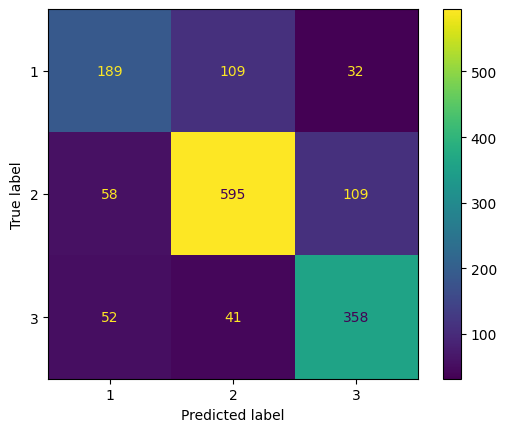

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
X = merged_data2.drop('DrivingStyle' , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(X)
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [53]:
column_order = X.columns.tolist()
column_order

['vehicle length',
 'vehicle weight',
 'axles number',
 'vehicle speed',
 'road condition',
 'Air temperature',
 'precipitation type',
 'precipitation intensity',
 'relative humidity',
 'wind direction',
 'wind speed',
 'Lighting condition']

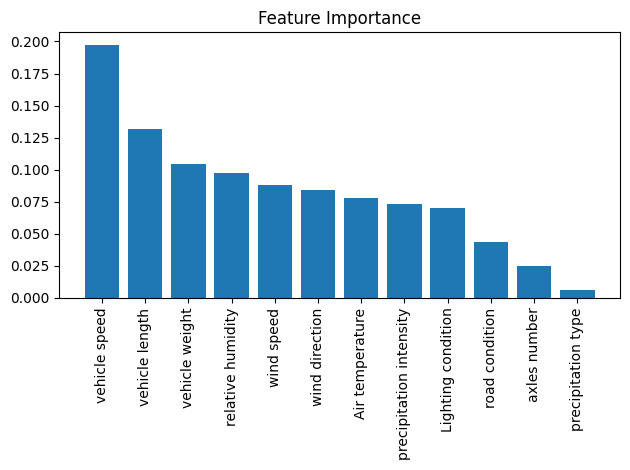

In [52]:
import numpy as np
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [53]:
print(importances[sorted_indices])

[0.19726136 0.13190595 0.10481534 0.09719429 0.08821373 0.08400239
 0.07793205 0.07304067 0.07041378 0.0439382  0.02473499 0.00654726]


---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7368762151652625
f1 score = 0.7111588482060518
precision = 0.7107670895440168
recall =  0.7136296710139614
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.728451069345431
f1 score = 0.6998938076741337
precision = 0.7017435734418379
recall =  0.7006774097805403
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7316915100453661
f1 score = 0.7035771536060159
precision = 0.7056814567334623
recall =  0.7043116007394863
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7355800388852884
f1 score = 0.7069503414316904
precision = 0.7099893128408493
recall =  0.7069975731969204
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7271548930654569
f1 score = 0.6989564605604851
precision = 0.7009754580007636


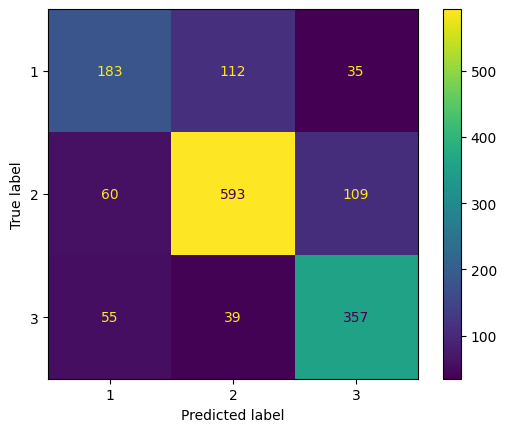

In [54]:
X = merged_data2.drop(['DrivingStyle','precipitation type','precipitation intensity'] , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [55]:
for x in range(10):
  scaler =StandardScaler()
  scaler.fit_transform(X)
  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(X, y)
  y_pred = neigh.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
[1 3 3 ... 1 2 1]
accuracy = 0.7342838626053143
f1 score = 0.70238224568853
precision = 0.7925732808910378
recall =  0.7355812785042667
---------------------------------
---------------------------------
[1 3 3 ... 1 2 1]
accuracy = 0.7342838626053143
f1 score = 0.70238224568853
precision = 0.7925732808910378
recall =  0.7355812785042667
---------------------------------
---------------------------------
[1 3 3 ... 1 2 1]
accuracy = 0.7342838626053143
f1 score = 0.70238224568853
precision = 0.7925732808910378
recall =  0.7355812785042667
---------------------------------
---------------------------------
[1 3 3 ... 1 2 1]
accuracy = 0.7342838626053143
f1 score = 0.70238224568853
precision = 0.7925732808910378
recall =  0.7355812785042667
---------------------------------
---------------------------------
[1 3 3 ... 1 2 1]
accuracy = 0.7342838626053143
f1 score = 0.70238224568853
precision = 0.7925732808910378
recall = 

In [56]:
#from sklearn.pipeline import make_pipeline
#from sklearn.svm import SVC
#for x in range(10):
  #clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  #clf2.fit(X, y)
  #y_pred = clf2.predict(x_test)
  #print("---------------------------------")
  #print("---------------------------------")
  #print(y_pred)
  #print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  #print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  #print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  #print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
---------------------------------
---------------------------------


In [57]:
from sklearn.linear_model import LogisticRegression
for x in range(10):
  clf = LogisticRegression(multi_class='multinomial').fit(X, y)
  y_pred = clf.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.5119896305897602
f1 score = 0.36038101853053944
precision = 0.33072387939450815
recall =  0.4205996977650521
---------------------------------
---------------------------------
---------------------------------
---------------------------------


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1

In [58]:
#merged_data2.corr()

In [59]:
#plt.figure(figsize=(17,17))
#import seaborn as sns
#sns.heatmap(merged_data2.corr(), annot = True, fmt='.2g')


# **Feature selection and dimensionility reduction**


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, f_classif
X = merged_data2.drop('DrivingStyle' , axis = 1)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
features = np.array(X.columns)
filter = model.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best")
print(features[filter])
print(X_new)

All features:
['vehicle length' 'vehicle weight' 'axles number' 'vehicle speed'
 'road condition' 'Air temperature' 'precipitation type'
 'precipitation intensity' 'relative humidity' 'wind direction'
 'wind speed' 'Lighting condition']
[ True  True  True  True  True  True False  True  True  True  True  True]
Selected best
['vehicle length' 'vehicle weight' 'axles number' 'vehicle speed'
 'road condition' 'Air temperature' 'precipitation intensity'
 'relative humidity' 'wind direction' 'wind speed' 'Lighting condition']
[[1.26500000e+03 1.02430000e+04 2.00000000e+00 ... 1.25157895e+02
  5.26315789e-02 0.00000000e+00]
 [1.68000000e+03 3.08710000e+04 6.00000000e+00 ... 1.57818182e+02
  6.00000000e+00 0.00000000e+00]
 [9.36000000e+02 3.22400000e+03 4.00000000e+00 ... 6.44545455e+01
  0.00000000e+00 0.00000000e+00]
 ...
 [1.74700000e+03 3.18640000e+04 6.00000000e+00 ... 2.85000000e+02
  5.57894737e+00 2.00000000e+00]
 [7.10000000e+02 3.24400000e+03 2.00000000e+00 ... 3.08466667e+02
  3.666

/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [61]:

select = SelectKBest(score_func= f_classif, k=5)
z = select.fit_transform(X, y)
filter = select.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(features[filter])
print(z)

All features:
['vehicle length' 'vehicle weight' 'axles number' 'vehicle speed'
 'road condition' 'Air temperature' 'precipitation type'
 'precipitation intensity' 'relative humidity' 'wind direction'
 'wind speed' 'Lighting condition']
[ True  True  True False False False False  True False False False  True]
Selected best 4:
['vehicle length' 'vehicle weight' 'axles number'
 'precipitation intensity' 'Lighting condition']
[[1.2650e+03 1.0243e+04 2.0000e+00 0.0000e+00 0.0000e+00]
 [1.6800e+03 3.0871e+04 6.0000e+00 0.0000e+00 0.0000e+00]
 [9.3600e+02 3.2240e+03 4.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.7470e+03 3.1864e+04 6.0000e+00 2.0000e+00 2.0000e+00]
 [7.1000e+02 3.2440e+03 2.0000e+00 2.0000e+00 2.0000e+00]
 [2.0010e+03 2.7812e+04 6.0000e+00 2.0000e+00 2.0000e+00]]


---------------------------------
---------------------------------
[2 1 3 ... 2 2 2]
accuracy = 0.7342838626053143
f1 score = 0.704848864337872
precision = 0.7070023974068448
recall =  0.7058823301189346
---------------------------------
---------------------------------
[3 1 3 ... 1 2 2]
accuracy = 0.7310434219053791
f1 score = 0.7015785366468515
precision = 0.70285283127761
recall =  0.7031224478314932
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7362281270252754
f1 score = 0.7073326095081546
precision = 0.710271767240784
recall =  0.708038324477733
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7440051847051199
f1 score = 0.7174170512250605
precision = 0.7207187465364301
recall =  0.7170252554350883
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7342838626053143
f1 score = 0.7053613983248321
precision = 0.7077369696091157
reca

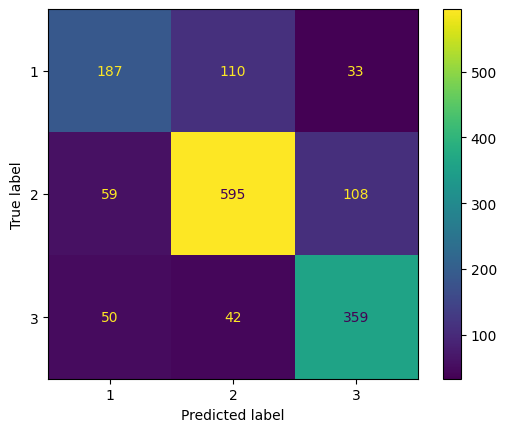

In [62]:
#X = merged_data2[['vehicle length','veincle weight','axles number','veincle speed','Lighting condition']]
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
X = merged_data2.drop('DrivingStyle' , axis = 1)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
fit6 = sfs.fit(X, y)
filter = sfs.get_support(True)


In [64]:
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(merged_data2.iloc[:,filter].columns)
print(fit6)

All features:
['vehicle length' 'vehicle weight' 'axles number' 'vehicle speed'
 'road condition' 'Air temperature' 'precipitation type'
 'precipitation intensity' 'relative humidity' 'wind direction'
 'wind speed' 'Lighting condition']
[ 2  3  4  6  7 10 11]
Selected best 4:
Index(['axles number', 'DrivingStyle', 'vehicle speed', 'Air temperature',
       'precipitation type', 'wind direction', 'wind speed'],
      dtype='object')
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=7)


---------------------------------
---------------------------------
[3 2 2 ... 1 1 3]
accuracy = 0.43810758263123784
f1 score = 0.3940639354749648
precision = 0.399675513174269
recall =  0.3927048475924988
---------------------------------
---------------------------------
[3 2 2 ... 1 1 2]
accuracy = 0.4458846403110823
f1 score = 0.39984388504313867
precision = 0.4070408433852548
recall =  0.398496196844574
---------------------------------
---------------------------------
[3 2 2 ... 1 1 2]
accuracy = 0.4426441996111471
f1 score = 0.3984296798044919
precision = 0.40394958803505077
recall =  0.39748493190014217
---------------------------------
---------------------------------
[3 2 2 ... 1 1 2]
accuracy = 0.44653272845106934
f1 score = 0.4027206863577031
precision = 0.40867401322252367
recall =  0.4010452130290809
---------------------------------
---------------------------------
[3 2 2 ... 1 1 3]
accuracy = 0.4439403758911212
f1 score = 0.3986504380684362
precision = 0.404871604058

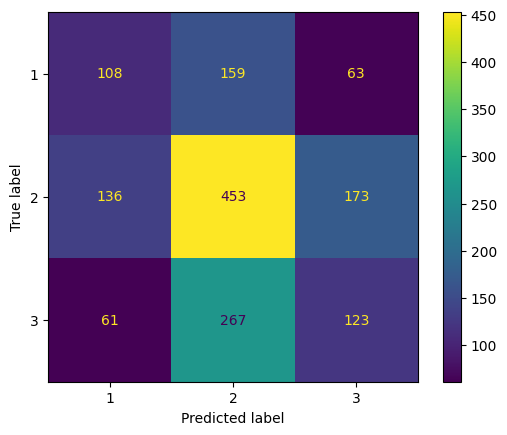

In [65]:
X = merged_data2[['axles number', 'precipitation type', 'wind direction',
       'wind speed']]
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [66]:
X = merged_data2.drop('DrivingStyle' , axis = 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
principalComponents = pca.transform(scaled_data)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
newDataframe = pd.concat([principalDataframe, y],axis = 1)
newDataframe.head(5)

,PC1,PC2,DrivingStyle
0,-0.907135,0.058783,2.0
1,1.875031,-0.808129,2.0
2,-0.903210,1.351104,2.0
3,-0.418808,0.124760,2.0
4,-0.996469,0.120402,2.0


In [67]:
principalDataframe

,PC1,PC2
0,-0.907135,0.058783
1,1.875031,-0.808129
2,-0.903210,1.351104
3,-0.418808,0.124760
4,-0.996469,0.120402
...,...,...
12852,-0.331731,2.763111
12853,-0.622429,3.413463
12854,3.348716,2.165830
12855,-0.483455,1.991316


---------------------------------
---------------------------------
[1 2 3 ... 1 3 2]
accuracy = 0.5430978613091381
f1 score = 0.5020729884620458
precision = 0.507543102012296
recall =  0.49888533888917985
---------------------------------
---------------------------------
[1 2 3 ... 1 3 2]
accuracy = 0.5437459494491251
f1 score = 0.5052438211771134
precision = 0.5119826933840478
recall =  0.5012811037201281
---------------------------------
---------------------------------
[1 2 3 ... 1 3 2]
accuracy = 0.5482825664290344
f1 score = 0.5089164169414283
precision = 0.5138274892478109
recall =  0.5058821361298795
---------------------------------
---------------------------------
[1 2 3 ... 1 3 2]
accuracy = 0.5385612443292288
f1 score = 0.5014645578009634
precision = 0.5069076150585153
recall =  0.49796059306333934
---------------------------------
---------------------------------
[1 2 3 ... 1 3 2]
accuracy = 0.542449773169151
f1 score = 0.5025748488530238
precision = 0.5086762079626301

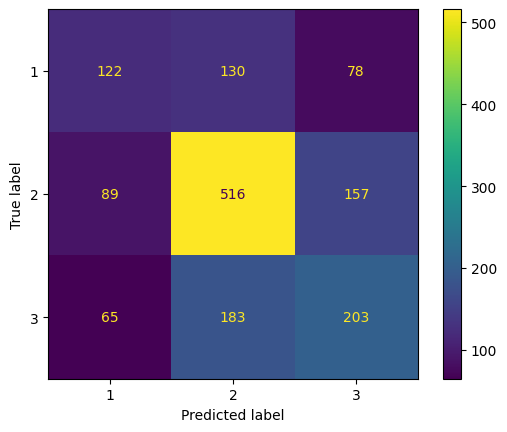

In [68]:
X = principalDataframe
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# **Oversampling and Undersampling**

In [69]:
from collections import Counter
X = merged_data2.drop(['DrivingStyle'] , axis = 1)

In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print(sorted(Counter(X_resampled).items()))

[(1, 6346), (2, 6346), (3, 6346)]
[('Air temperature', 1), ('Lighting condition', 1), ('axles number', 1), ('precipitation intensity', 1), ('precipitation type', 1), ('relative humidity', 1), ('road condition', 1), ('vehicle length', 1), ('vehicle speed', 1), ('vehicle weight', 1), ('wind direction', 1), ('wind speed', 1)]


dict_items([(2, 6346), (1, 2741), (3, 3770)])
dict_items([(2, 6346), (1, 6346), (3, 6346)])
2    6346
3    3770
1    2741
Name: DrivingStyle, dtype: int64


([<matplotlib.patches.Wedge at 0x7f79e5d830a0>,
 [Text(0.02217315292679917, 1.0997765006078666, ''),
  Text(-0.7001221014856635, -0.8484273940717018, ''),
  Text(0.8623676270282761, -0.6828777898376988, '')])

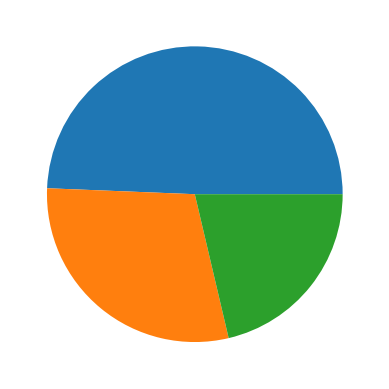

In [71]:
z = Counter(y).items()
v = Counter(y_resampled).items()
u = y.value_counts()
print(z)
print(v)
print(u)
d = merged_data2.DrivingStyle.values
plt.pie(u)

---------------------------------
---------------------------------
[2 2 1 ... 3 3 1]
accuracy = 0.8665966386554622
f1 score = 0.8637871345578455
precision = 0.8714826597827926
recall =  0.8669008545133886
---------------------------------
---------------------------------
[2 2 1 ... 3 3 1]
accuracy = 0.8650210084033614
f1 score = 0.8619268184729837
precision = 0.8712003045575498
recall =  0.8654011677949148
---------------------------------
---------------------------------
[2 2 1 ... 3 3 1]
accuracy = 0.868172268907563
f1 score = 0.8653313183057639
precision = 0.8735532974009929
recall =  0.8684885438148052
---------------------------------
---------------------------------
[2 2 1 ... 3 3 1]
accuracy = 0.865546218487395
f1 score = 0.8625796259403433
precision = 0.8708341810093034
recall =  0.865848594144358
---------------------------------
---------------------------------
[2 2 1 ... 3 3 1]
accuracy = 0.868172268907563
f1 score = 0.8655003319808504
precision = 0.8738224404961222
rec

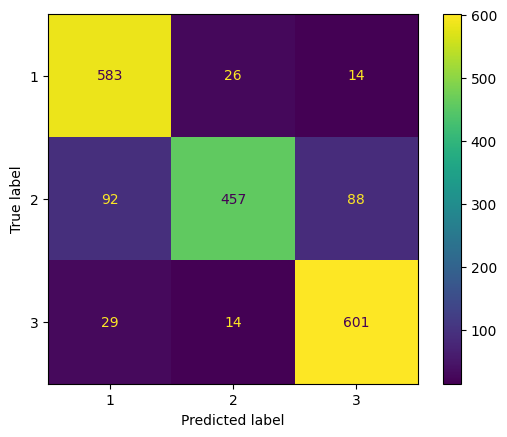

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.1,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

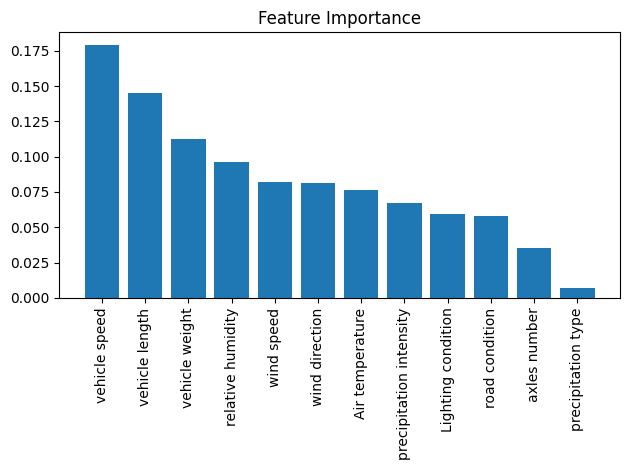

In [73]:
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [74]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf2, X_resampled, y_resampled, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.80357143 0.79017857 0.78308824 0.90018387 1.        ]
Average CV Score:  0.855404421421839
Number of CV Scores used in Average:  5


In [75]:
# import pickle

# with open('model.pkl', 'wb') as f:
#     pickle.dump(clf2, f)